# <center>CMPBIO210, IB120, IB201
# <center>"Introduction to Quantitative Methods in Biology"
# <center>Lecture 6. Transcription factor circuits with memory
## <center>Denis Titov

**The goal of this jupyter notebook is to discuss how to formulate, solve and analyze ODE model for transcription factor circuits that have memory**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.integrate import solve_ivp

## Memory example #1: Positive autoregulation with one trascription factor

Our goal is try to come up with a system consisting of one transcription factor *TF* that can maintain ON state (high *TF*) or OFF state (low *TF*) indefinitely and can be switched between ON and OFF states by short term changes of *TF* production or degradation.  

Lets' first analyze the simplest model with constant *TF* production rate $\alpha$ and degradation rate $\gamma$. The model is then:  
  
$\frac{dX}{dt}=\alpha- \gamma X$  
  


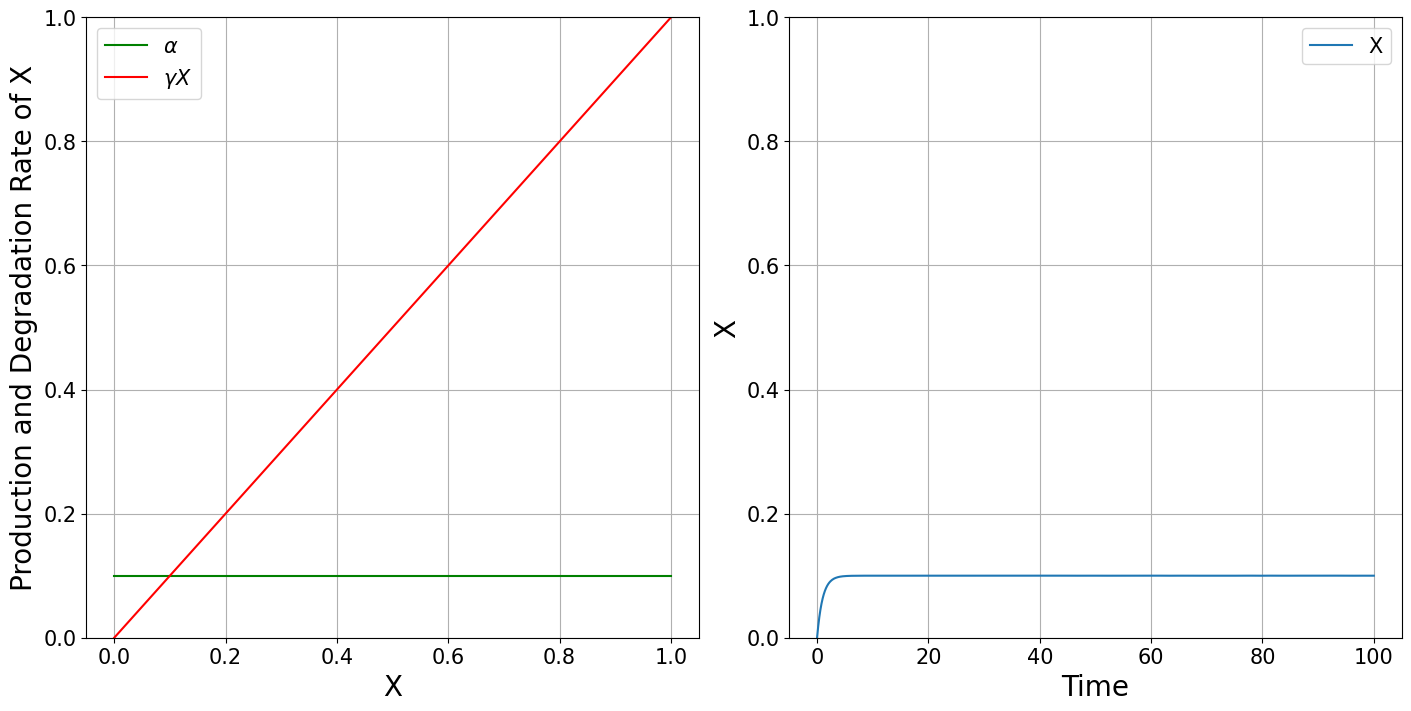

In [3]:
α = 0.1  # background production rate constant of X
γ = 1.0  # degradation rate constant of X
Kd = 1.0  # binding constant of X to its own promoter


def Positive_Autoregulation(t, y):
    X = y
    dXdt = α - γ * X
    return dXdt


initial_condition = [0]
tspan = [0, 100]
soln = solve_ivp(
    Positive_Autoregulation,
    tspan,
    initial_condition,
    t_eval=np.linspace(0, tspan[1], 1000),
)
X_range = np.linspace(0, 1, 1000)
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 7), dpi=100, constrained_layout=True
)
axs[0].plot(
    X_range,
    α * np.ones(len(X_range)),
    label=r'$\alpha$',
    c="green"
)
axs[0].plot(X_range, γ * X_range, label=r"$\gamma X$", c="red")
axs[0].set_xlabel("X", fontsize=20)
axs[0].set_ylabel("Production and Degradation Rate of X", fontsize=20)

axs[1].plot(soln.t, soln.y[0], label="X")
axs[1].set_xlabel("Time", fontsize=20)
axs[1].set_ylabel("X", fontsize=20)

for ax in axs:
    ax.tick_params(labelsize=15)
    # ax.set_xlim(0,1)
    ax.set_ylim(0.0,1)
    ax.grid()
    ax.legend(fontsize=15)

We can also find fixed points where $\frac{dX}{dt}=\alpha- \gamma X=0$, which will be only one point $X=\frac{\alpha}{\gamma}$. Based on graphs above and presence of only one fixed point we can conclude that this system **cannot** exist in two states.

### Lets add positive autoregulation of *TF* by itself

Positive autoregulation of a single transcription factor referes to a situation where *TF* can increase its own transcription by binding to its own DNA promoter. A very common regulation for transcription factors.

The model is then:  
  
$\frac{dX}{dt}=f(X)- \gamma X$  
  
where $\gamma$ is the degradation rate constant and $f(X)$ is positive autoregulation.  
  
Let's analyze this model to see how it changes depending on different $f(X)$  
First lets try $f(X)=\alpha + (β-α) \frac{\frac{X}{K_d}}{(1 + \frac{X}{K_d})}$ where $\alpha$ is the background production rate of X and   $(β-α) \frac{\frac{X}{K_d}}{(1 + \frac{X}{K_d})}$ is the positive autoregulation


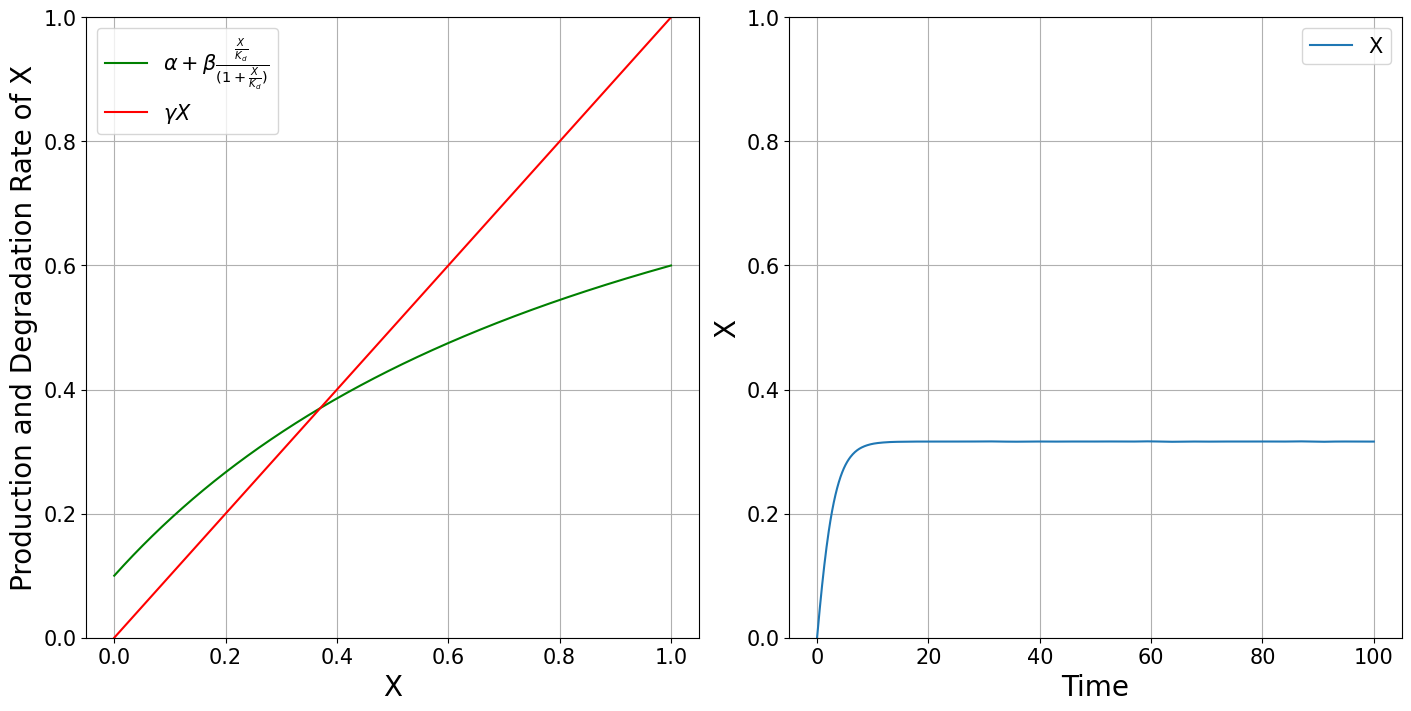

In [4]:
α = 0.1  # background production rate constant of X
β = 1.0  # positive autoregulation production rate constant of X
γ = 1.0  # degradation rate constant of X
Kd = 1.0  # binding constant of X to its own promoter


def Positive_Autoregulation(t, y):
    X = y
    dXdt = α + (β-α) * ((X / Kd) / (1 + (X / Kd))) - γ * X
    return dXdt


initial_condition = [0]
tspan = [0, 100]
soln = solve_ivp(
    Positive_Autoregulation,
    tspan,
    initial_condition,
    t_eval=np.linspace(0, tspan[1], 1000),
)
X_range = np.linspace(0, 1, 1000)
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 7), dpi=100, constrained_layout=True
)
axs[0].plot(
    X_range,
    α + β * ((X_range / Kd) / (1 + (X_range / Kd))),
    label=r"$\alpha + \beta \frac{\frac{X}{K_d}}{(1 + \frac{X}{K_d})}$", c="green"
)
axs[0].plot(X_range, γ * X_range, label=r"$\gamma X$", c="red")
axs[0].set_xlabel("X", fontsize=20)
axs[0].set_ylabel("Production and Degradation Rate of X", fontsize=20)

axs[1].plot(soln.t, soln.y[0], label="X")
axs[1].set_xlabel("Time", fontsize=20)
axs[1].set_ylabel("X", fontsize=20)

for ax in axs:
    ax.tick_params(labelsize=15)
    # ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.grid()
    ax.legend(fontsize=15)

We can also find fixed points where $\frac{dX}{dt}=\alpha + \beta \frac{\frac{X}{K_d}}{(1 + \frac{X}{K_d})}- \gamma X$. which will be only one point $X=\frac{\alpha}{\gamma}$.

In [5]:
α, β, γ, X, Kd = sym.symbols("α,β,γ,X,K_d")
solution = sym.nonlinsolve([α + (β-α) * (X / Kd) / (1 + (X / Kd))-γ * X], [X])
#To get an analytical solution have the expression ending on solution
#To get numerical solution end with solution.subs({α: 1, γ: 1, Kd: 1})
solution.subs({α: 1, β: 2, γ: 0.1, Kd: 1})
# solution

FiniteSet(({-0.512492197250394, 19.5124921972504},))

Based on graphs above and presence of only one positive fixed point we can conclude that this system does not exist in two states. Furthermore, from the graph you can see that as long as $\alpha$ is positive there will always be only one positive fixed points.

### Now lets try cooperative positive autoregulation $f(X)=\alpha + \beta \frac{(\frac{X}{K_d})^n}{(1 + (\frac{X}{K_d})^n)}$  
$\frac{(\frac{X}{K_d})^n}{(1 + (\frac{X}{K_d})^n)}$ is referred to as the Hill equation and is a common way to discribe cooperative interactions where multiple molecules bind to a receptor and binding of second molecule is more favorable than binidng firs molecules (e.g.,  binding of oxygen to hemoglobin, binding of transcritpion factor to several promoter sites, binding of ligands to repressors). Hill equation can be derived by assuming that the receptor is either not bound to ligard or is bound to all n ligands.


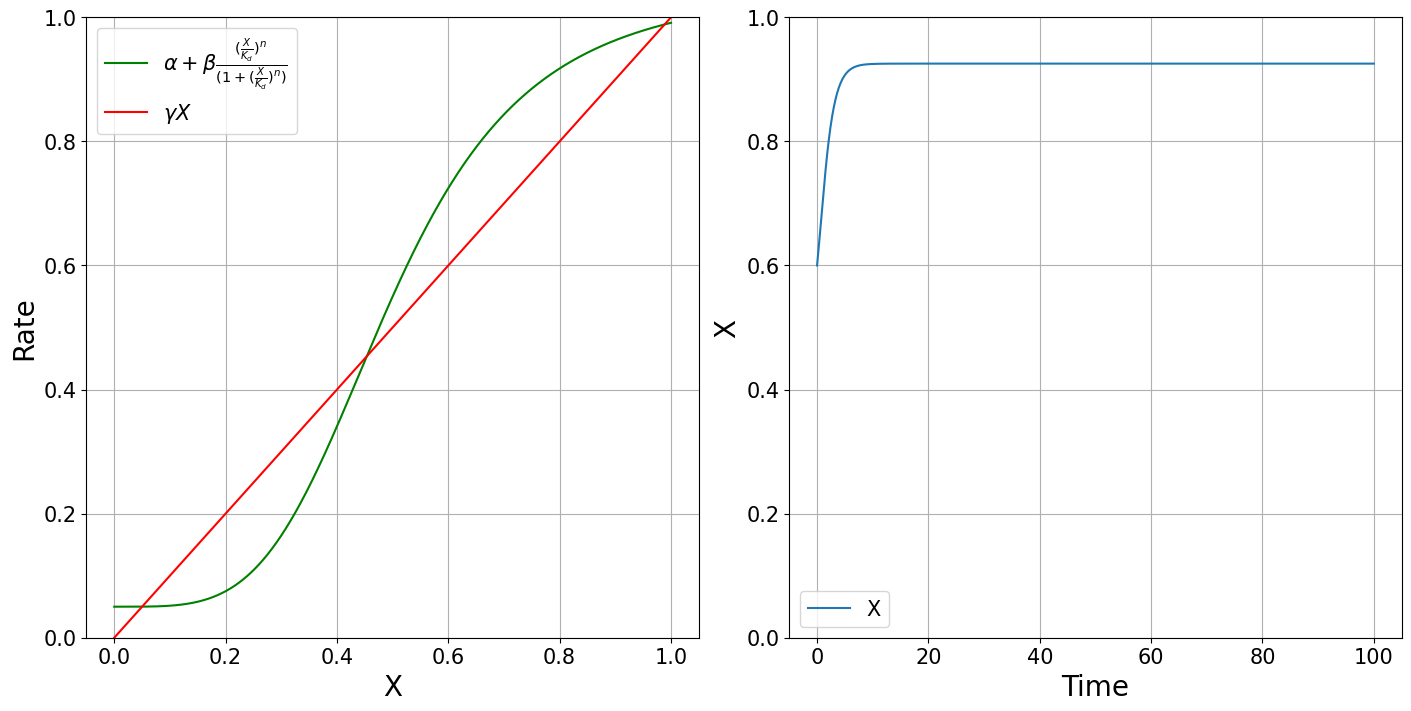

In [6]:
α = 0.05  # background production rate constant of X
β = 1.0  # positive autoregulation production rate constant of X
γ = 1.0  # degradation rate constant of X
Kd = 0.5  # binding constant of X to its own promoter
n = 4


def Positive_Autoregulation(t, y):
    X = y
    dXdt = α + (β-α) * ((X / Kd) ** n / (1 + (X / Kd) ** n)) - γ * X
    return dXdt


initial_condition = [0.6]
tspan = [0, 100]
soln = solve_ivp(
    Positive_Autoregulation,
    tspan,
    initial_condition,
    t_eval=np.linspace(0, tspan[1], 1000),
    method="LSODA",
)
X_range = np.linspace(0, 1, 1000)
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 7), dpi=100, constrained_layout=True
)
axs[0].plot(
    X_range,
    α + β * ((X_range / Kd) ** n / (1 + (X_range / Kd) ** n)),
    label=r"$\alpha + \beta \frac{(\frac{X}{K_d})^n}{(1 + (\frac{X}{K_d})^n)}$",
    c="green"
)
axs[0].plot(X_range, γ * X_range, label=r"$\gamma X$", c="red")
axs[0].set_xlabel("X", fontsize=20)
axs[0].set_ylabel("Rate", fontsize=20)

axs[1].plot(soln.t, soln.y[0], label="X")
axs[1].set_xlabel("Time", fontsize=20)
axs[1].set_ylabel("X", fontsize=20)

for ax in axs:
    ax.tick_params(labelsize=15)
    # ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.grid()
    ax.legend(fontsize=15)

### Let's draw a solution of this ODE without solving it using a streamplot and quiverplot

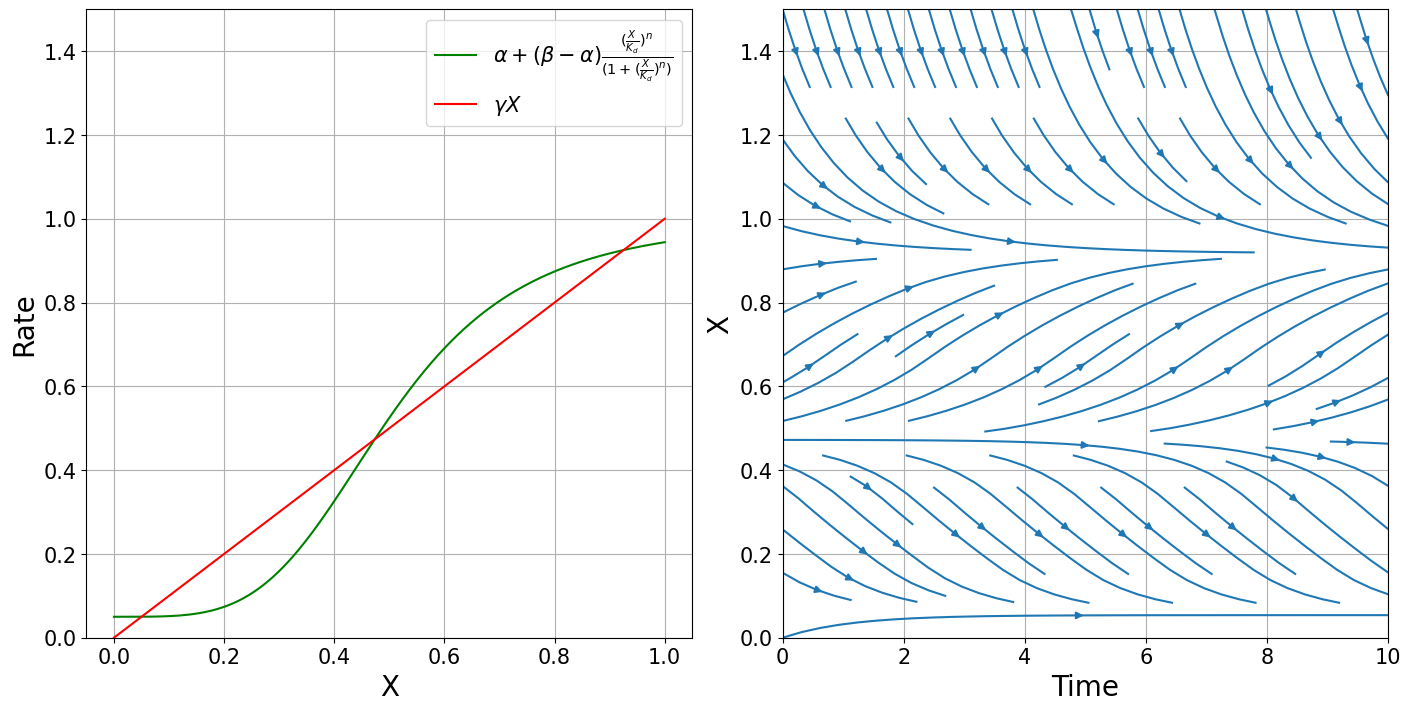

In [7]:
α = 0.05  # background production rate constant of X
β = 1.0  # positive autoregulation production rate constant of X
γ = 1.0  # degradation rate constant of X
Kd = 0.5  # binding constant of X to its own promoter
n = 4

X, t = np.mgrid[0:1.5:10j, 0:10:10j]
slope = dXdt = α + (β-α) * ((X / Kd) ** n / (1 + (X / Kd) ** n)) - γ * X
dt, dX = np.cos(np.arctan(slope)), np.sin(np.arctan(slope))

X_range = np.linspace(0, 1, 1000)
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 7), dpi=100, constrained_layout=True
)
axs[0].plot(
    X_range,
    α + (β-α) * ((X_range / Kd) ** n / (1 + (X_range / Kd) ** n)),
    label=r"$\alpha + (β-α) \frac{(\frac{X}{K_d})^n}{(1 + (\frac{X}{K_d})^n)}$",
    c="green"
)
axs[0].plot(X_range, γ * X_range, label=r"$\gamma X$", c="red")
axs[0].set_xlabel("X", fontsize=20)
axs[0].set_ylabel("Rate", fontsize=20)
axs[0].legend(fontsize=15)

# axs[1].quiver(t, X, dt, dX) # try to uncomment either quiver or streamplot to see the difference
axs[1].streamplot(t, X, dt, dX)
axs[1].set_xlabel("Time", fontsize=20)
axs[1].set_ylabel("X", fontsize=20)

for ax in axs:
    ax.tick_params(labelsize=15)
    # ax.set_xlim(0,1.5)
    ax.set_ylim(0,1.5)
    ax.grid()

We can also find fixed points where $\frac{dX}{dt}=\alpha + (\beta-\alpha) \frac{(\frac{X}{K_d})^n}{(1 + (\frac{X}{K_d})^n)}- \gamma X=0$, but these are pretty complex equations and we will not do it here.

Based on graphs above you can see that as long production curve starts above degradation curve at $X=0$ and intersects with degradation curve at three positive values of $X$, then the system will have to stable solutions. The latter is not always the case but depends on specific values of $\alpha, \beta, K_d, n, \gamma$. The system can be switched between those by temporarily changing production and degradation rate to increase or decreas $X$ beyond a threshold of unstable middle foxed point.

### Let's simulate a switch between low X and high X by temporarily increasing the production or degradation of X

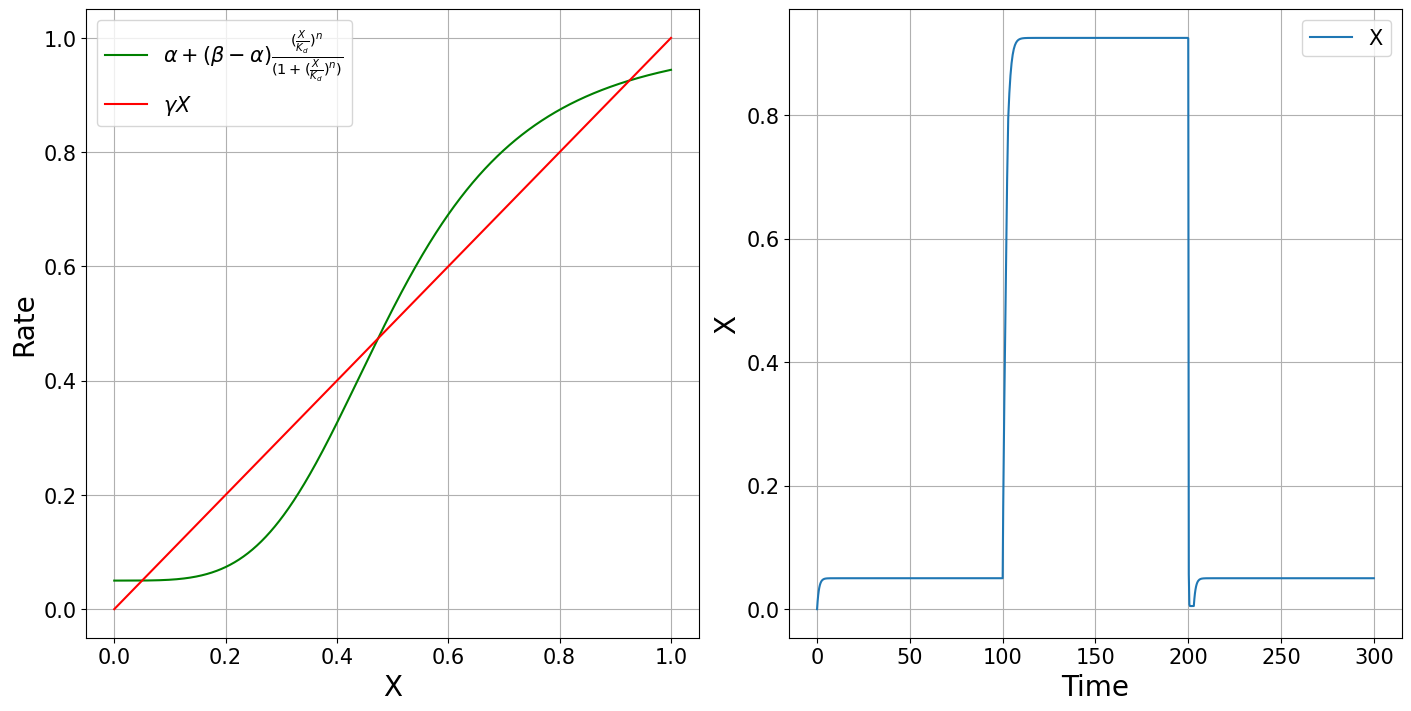

In [13]:
α = 0.05  # background production rate constant of X
β = 1.0  # positive autoregulation production rate constant of X
γ = 1.0  # degradation rate constant of X
Kd = 0.5  # binding constant of X to its own promoter
n = 4
perturbation_period = 3


def Positive_Autoregulation(t, y):
    if 100 < t < 100 + perturbation_period:
        α = 0.5
    else:
        α = 0.05
    if 200 < t < 200 + perturbation_period:
        γ = 10
    else:
        γ = 1.0
    X = y
    dXdt = α + (β-α) * ((X / Kd) ** n / (1 + (X / Kd) ** n)) - γ * X
    return dXdt


initial_condition = [0.0]
tspan = [0, 300]
soln = solve_ivp(
    Positive_Autoregulation,
    tspan,
    initial_condition,
    t_eval=np.linspace(0, tspan[1], 1000),
    method="LSODA",
    max_step=0.1,
)
X_range = np.linspace(0, 1, 1000)
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 7), dpi=100, constrained_layout=True
)
axs[0].plot(
    X_range,
    α + (β-α) * ((X_range / Kd) ** n / (1 + (X_range / Kd) ** n)),
    label=r"$\alpha + (β-α) \frac{(\frac{X}{K_d})^n}{(1 + (\frac{X}{K_d})^n)}$",
    c="green"
)
axs[0].plot(X_range, γ * X_range, label=r"$\gamma X$", c="red")
axs[0].set_xlabel("X", fontsize=20)
axs[0].set_ylabel("Rate", fontsize=20)

axs[1].plot(soln.t, soln.y[0], label="X")
axs[1].set_xlabel("Time", fontsize=20)
axs[1].set_ylabel("X", fontsize=20)

for ax in axs:
    ax.tick_params(labelsize=15)
    # ax.set_xlim(0,1)
    # ax.set_ylim(0,1)
    ax.grid()
    ax.legend(fontsize=15)

## Memory example #2: Bistability of toggle switch with two mutually repressing TFs

Let's study a model where two transcription factors mutually inhibit each other with cooperative inhibition functions. An example of such a system is lambda bacteriophage which incorporates in the genome and stays dormant while only expressing transcription factor C1, which represses transcription factor cro. C1 can get degraded in response to DNA damage which activates cro and cro start a lysis program killing bacteria and releasing the phage. The evolutionary benefit for the phage is if bacteria are doing fine then its better to propagate while being in the genome of bacteria but if bacteria is not doing well (DNA damage is a stress response in bacteria to induce mutations) then it mighe be better for phage to get our of bacteria.

The model is then:  
  
$\frac{dX}{dt}=\alpha + (β-α) \frac{1}{(1 + (\frac{Y}{K_d})^n)}- \gamma X$  
$\frac{dY}{dt}=\alpha + (β-α) \frac{1}{(1 + (\frac{X}{K_d})^n)}- \gamma Y$  
  

Let's analyze this model

### Here we review nullcline analysis which is a powerful way to understand small systems of differential equations without solving them

The idea behind nullcline analysis is to draw lines corresponding to solution of $\frac{dX}{dt}=0$ and $\frac{dY}{dt}=0$ (solutions of the form $Y=f(X)$) on top of a phase plot and use the intersection of $\frac{dX}{dt}=0$ and $\frac{dY}{dt}=0$ to find stable points. This will allow us to see what type of $\frac{dX}{dt}=0$ and $\frac{dY}{dt}=0$ lines would allow for the existance of two stable states.

/tmp/ipykernel_123/3868455830.py:24: RuntimeWarning: invalid value encountered in power
  (


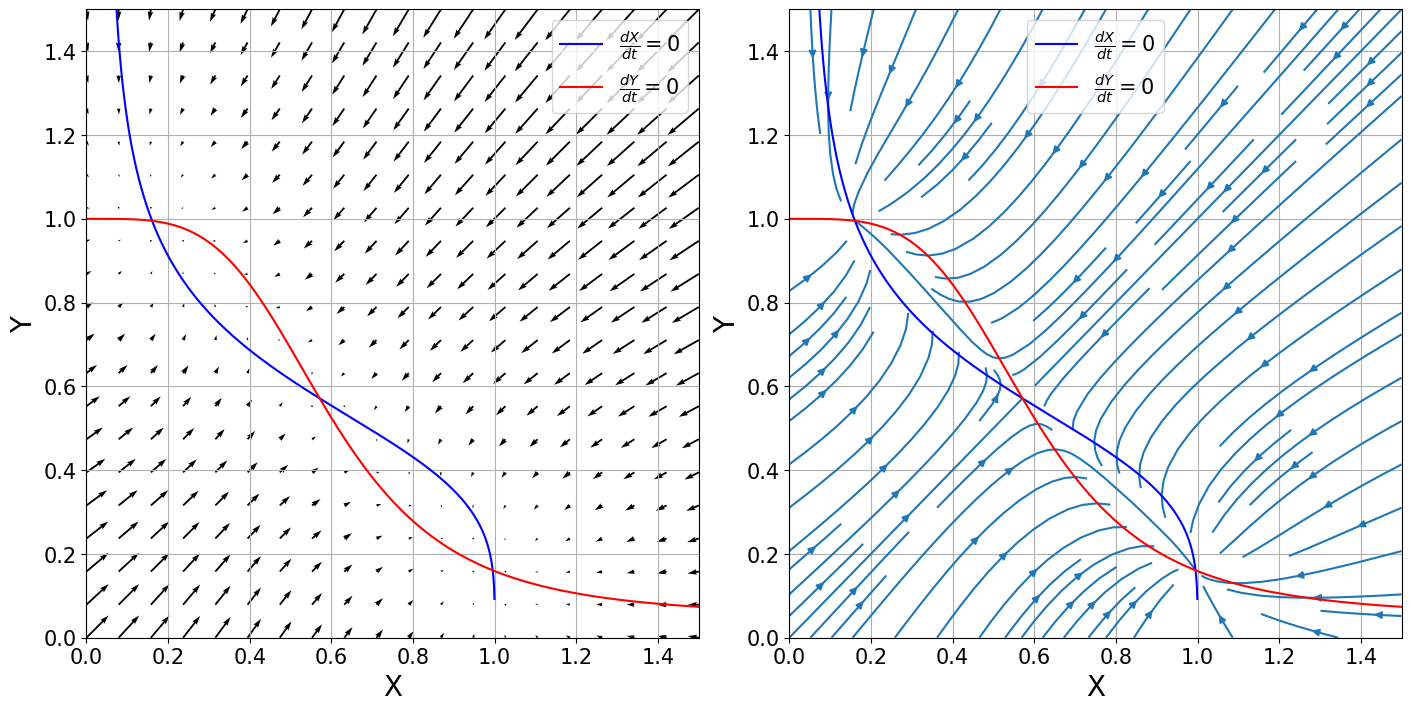

In [11]:
α = 0.05  # background production rate constant of X
β = 1.0  # positive autoregulation production rate constant of X
γ = 1.0  # degradation rate constant of X
Kd_X = 0.6  # binding constant of X to its own promoter
Kd_Y = 0.6  # binding constant of X to its own promoter
n = 4

Y, X = np.mgrid[0:1.5:20j, 0:1.5:20j]

dX_dt, dY_dt = (
    α + (β-α) * (1 / (1 + (Y / Kd_Y) ** n)) - γ * X,
    α + (β-α) * (1 / (1 + (X / Kd_X) ** n)) - γ * Y,
)
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 7), dpi=100, constrained_layout=True
)
axs[0].quiver(X, Y, dX_dt, dY_dt)
axs[1].streamplot(X, Y, dX_dt, dY_dt)

for ax in axs:
    X_range_dXdt = np.linspace(0.06, 1.05, 1000)
    ax.plot(
        X_range_dXdt,
        (
            -(Kd_Y ** n) * X_range_dXdt * γ / (X_range_dXdt * γ - α)
            + Kd_Y ** n * α / (X_range_dXdt * γ - α)
            + Kd_Y ** n * (β-α) / (X_range_dXdt * γ - α)
        )
        ** (1 / n),
        color="blue",
        label=r"$\frac{dX}{dt}=0$",
    )
    X_range_dYdt = np.linspace(0, 2, 1000)
    ax.plot(
        X_range_dYdt,
        (α + (β-α) / (1 + X_range_dYdt ** n / Kd_X ** n)) / γ,
        color="red",
        label=r"$\frac{dY}{dt}=0$",
    )
    ax.tick_params(labelsize=15)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(0, 1.5)
    ax.grid(which="major", axis="both")
    ax.set_xlabel("X", fontsize=20)
    ax.set_ylabel("Y", fontsize=20)
    ax.legend(fontsize=15)

Try decreasing $n$ to 1 and look at the plot. Do you think it is possible to have a curciut with memory if $n=1$?

### Let's simulate a switch between high X and high Y by temporarily increasing the production or degradation of X

/tmp/ipykernel_123/203107320.py:52: RuntimeWarning: invalid value encountered in power
  (


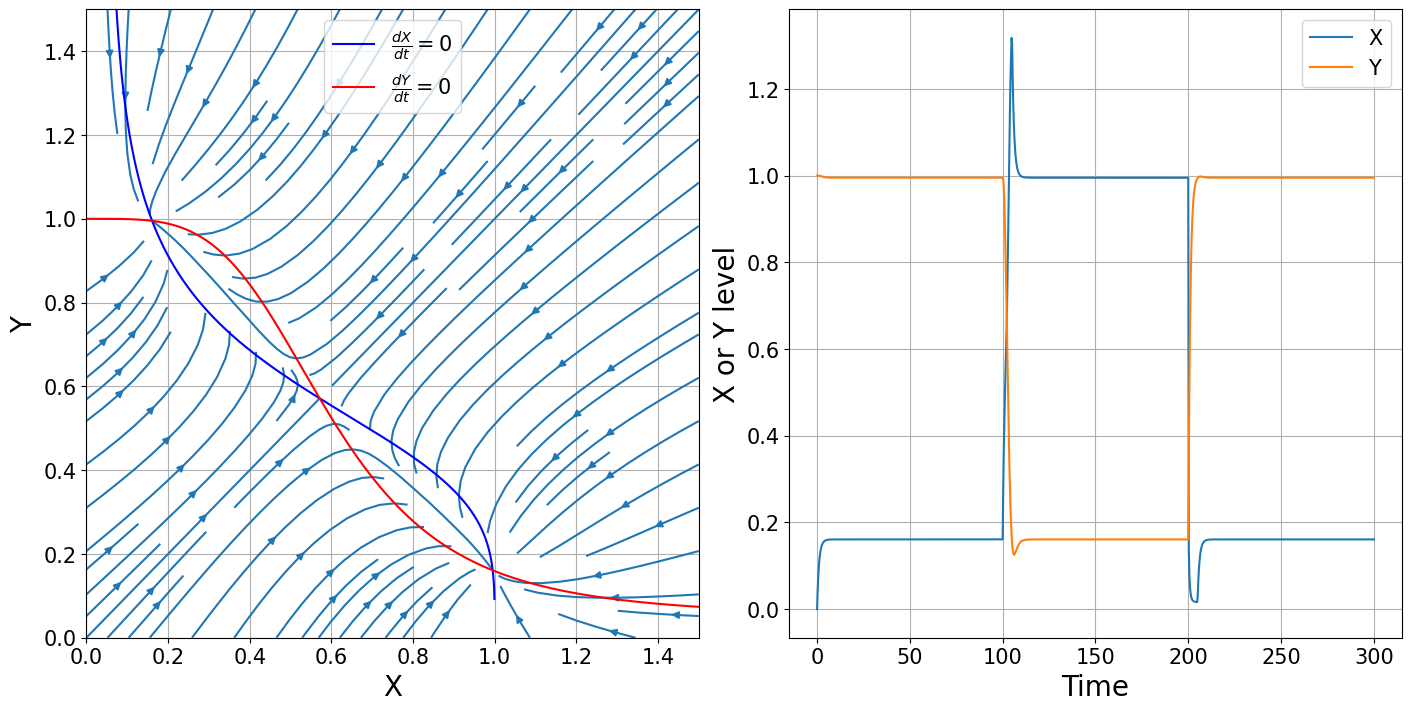

In [12]:
α_X = 0.05  # background production rate constant of X
α_Y = 0.05  # background production rate constant of Y
β = 1.0  # positive autoregulation production rate constant of X
γ_X = 1.0  # degradation rate constant of X
γ_Y = 1.0  # degradation rate constant of Y
Kd_X = 0.6  # binding constant of X to its own promoter
Kd_Y = 0.6  # binding constant of X to its own promoter
n = 4
perturbation_period = 5


def Toggle_Switch(t, y):
    if 100 < t < 100 + perturbation_period:
        α_X = 0.5
    else:
        α_X = 0.05
    if 200 < t < 200 + perturbation_period:
        γ_X = 10
    else:
        γ_X = 1.0
    X, Y = y
    dXdt = α_X + (β-α) * (1 / (1 + (Y / Kd_Y) ** n)) - γ_X * X
    dYdt = α_Y + (β-α) * (1 / (1 + (X / Kd_X) ** n)) - γ_Y * Y
    return [dXdt, dYdt]


initial_condition = [0.0, 1.0]
tspan = [0, 300]
soln = solve_ivp(
    Toggle_Switch,
    tspan,
    initial_condition,
    t_eval=np.linspace(0, tspan[1], 1000),
    method="LSODA",
    max_step=0.1,
)

fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 7), dpi=100, constrained_layout=True
)

# Plot streamplot
Y, X = np.mgrid[0:1.5:20j, 0:1.5:20j]
dX_dt, dY_dt = (
    α_X + (β-α) * (1 / (1 + (Y / Kd_Y) ** n)) - γ_X * X,
    α_Y + (β-α) * (1 / (1 + (X / Kd_X) ** n)) - γ_Y * Y,
)
axs[0].streamplot(X, Y, dX_dt, dY_dt)
X_range_dXdt = np.linspace(0.06, 1.05, 1000)
axs[0].plot(
    X_range_dXdt,
    (
        -(Kd_Y ** 4) * X_range_dXdt * γ_X / (X_range_dXdt * γ_X - α_X)
        + Kd_Y ** 4 * α_X / (X_range_dXdt * γ_X - α_X)
        + Kd_Y ** 4 * (β-α) / (X_range_dXdt * γ_X - α_X)
    )
    ** (1 / 4),
    color="blue",
    label=r"$\frac{dX}{dt}=0$",
)
X_range_dYdt = np.linspace(0, 2, 1000)
axs[0].plot(
    X_range_dYdt,
    (α_Y + (β-α_Y) / (1 + (X_range_dYdt ** n) / Kd_X ** n)) / γ_Y,
    color="red",
    label=r"$\frac{dY}{dt}=0$",
)
axs[0].set_xlim(0, 1.5)
axs[0].set_ylim(0, 1.5)
axs[0].set_xlabel("X", fontsize=20)
axs[0].set_ylabel("Y", fontsize=20)

# Plot solve_ivp() solutions
axs[1].plot(soln.t, soln.y[0], label="X")
axs[1].plot(soln.t, soln.y[1], label="Y")
axs[1].set_xlabel("Time", fontsize=20)
axs[1].set_ylabel("X or Y level", fontsize=20)

for ax in axs:
    ax.tick_params(labelsize=15)
    # ax.set_xlim(0,1)
    # ax.set_ylim(0,1)
    ax.grid()
    ax.legend(fontsize=15)